<a href="https://colab.research.google.com/github/ajit-ai/DataScience/blob/main/Clustering_Introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**What is K-means Clustering?**
Unsupervised Machine Learning is the process of teaching a computer to use unlabeled, unclassified data and enabling the algorithm to operate on that data without supervision. Without any previous data training, the machine’s job in this case is to organize unsorted data according to parallels, patterns, and variations.

K means clustering, assigns data points to one of the K clusters depending on their distance from the center of the clusters. It starts by randomly assigning the clusters centroid in the space. Then each data point assign to one of the cluster based on its distance from centroid of the cluster. After assigning each point to one of the cluster, new cluster centroids are assigned. This process runs iteratively until it finds good cluster. In the analysis we assume that number of cluster is given in advanced and we have to put points in one of the group.

In some cases, K is not clearly defined, and we have to think about the optimal number of K. K Means clustering performs best data is well separated. When data points overlapped this clustering is not suitable. K Means is faster as compare to other clustering technique. It provides strong coupling between the data points. K Means cluster do not provide clear information regarding the quality of clusters. Different initial assignment of cluster centroid may lead to different clusters. Also, K Means algorithm is sensitive to noise. It maymhave stuck in local minima.

What is the objective of k-means clustering?
The goal of clustering is to divide the population or set of data points into a number of groups so that the data points within each group are more comparable to one another and different from the data points within the other groups. It is essentially a grouping of things based on how similar and different they are to one another.

How k-means clustering works?
We are given a data set of items, with certain features, and values for these features (like a vector). The task is to categorize those items into groups. To achieve this, we will use the K-means algorithm, an unsupervised learning algorithm. ‘K’ in the name of the algorithm represents the number of groups/clusters we want to classify our items into.

(It will help if you think of items as points in an n-dimensional space). The algorithm will categorize the items into k groups or clusters of similarity. To calculate that similarity, we will use the Euclidean distance as a measurement.

The algorithm works as follows:  

First, we randomly initialize k points, called means or cluster centroids.
We categorize each item to its closest mean, and we update the mean’s coordinates, which are the averages of the items categorized in that cluster so far.
We repeat the process for a given number of iterations and at the end, we have our clusters.
The “points” mentioned above are called means because they are the mean values of the items categorized in them. To initialize these means, we have a lot of options. An intuitive method is to initialize the means at random items in the data set. Another method is to initialize the means at random values between the boundaries of the data set (if for a feature x, the items have values in [0,3], we will initialize the means with values for x at [0,3]).

The above algorithm in pseudocode is as follows:  

Initialize k means with random values
--> For a given number of iterations:
    
    --> Iterate through items:
    
        --> Find the mean closest to the item by calculating
        the euclidean distance of the item with each of the means
        
        --> Assign item to mean
        
        --> Update mean by shifting it to the average of the items in that cluster


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs


The code initializes three clusters for K-means clustering. It sets a random seed and generates random cluster centers within a specified range, and creates an empty list of points for each cluster.

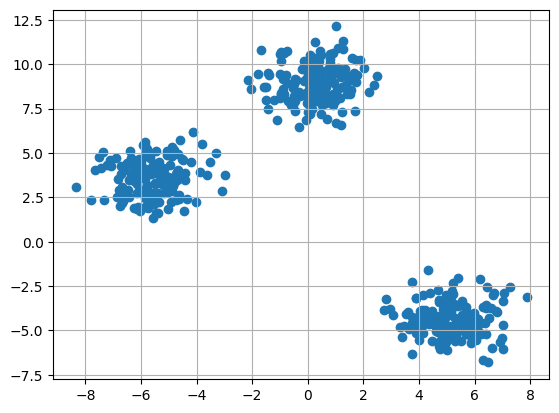

In [ ]:
X,y = make_blobs(n_samples = 500,n_features = 2,centers = 3,random_state = 23)

fig = plt.figure(0)
plt.grid(True)
plt.scatter(X[:,0],X[:,1])
plt.show()


In [ ]:
k = 3

clusters = {}
np.random.seed(23)

for idx in range(k):
	center = 2*(2*np.random.random((X.shape[1],))-1)
	points = []
	cluster = {
		'center' : center,
		'points' : []
	}

	clusters[idx] = cluster

clusters


{0: {'center': array([0.06919154, 1.78785042]), 'points': []},
 1: {'center': array([ 1.06183904, -0.87041662]), 'points': []},
 2: {'center': array([-1.11581855,  0.74488834]), 'points': []}}

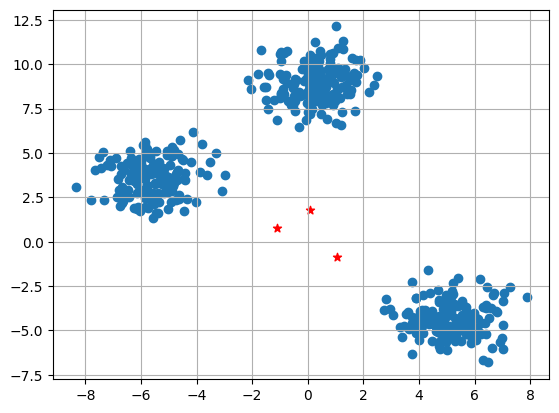

In [ ]:
plt.scatter(X[:,0],X[:,1])
plt.grid(True)
for i in clusters:
	center = clusters[i]['center']
	plt.scatter(center[0],center[1],marker = '*',c = 'red')
plt.show()


In [ ]:
def distance(p1,p2):
	return np.sqrt(np.sum((p1-p2)**2))


In [ ]:
#Implementing E step
def assign_clusters(X, clusters):
	for idx in range(X.shape[0]):
		dist = []

		curr_x = X[idx]

		for i in range(k):
			dis = distance(curr_x,clusters[i]['center'])
			dist.append(dis)
		curr_cluster = np.argmin(dist)
		clusters[curr_cluster]['points'].append(curr_x)
	return clusters

#Implementing the M-Step
def update_clusters(X, clusters):
	for i in range(k):
		points = np.array(clusters[i]['points'])
		if points.shape[0] > 0:
			new_center = points.mean(axis =0)
			clusters[i]['center'] = new_center

			clusters[i]['points'] = []
	return clusters


In [ ]:
def pred_cluster(X, clusters):
	pred = []
	for i in range(X.shape[0]):
		dist = []
		for j in range(k):
			dist.append(distance(X[i],clusters[j]['center']))
		pred.append(np.argmin(dist))
	return pred


In [ ]:
clusters = assign_clusters(X,clusters)
clusters = update_clusters(X,clusters)
pred = pred_cluster(X,clusters)


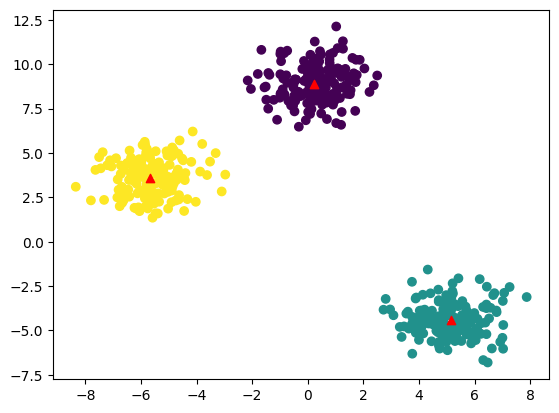

In [ ]:
plt.scatter(X[:,0],X[:,1],c = pred)
for i in clusters:
	center = clusters[i]['center']
	plt.scatter(center[0],center[1],marker = '^',c = 'red')
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans


In [ ]:
X, y = load_iris(return_X_y=True)


In [ ]:
#Find optimum number of cluster
sse = [] #SUM OF SQUARED ERROR
for k in range(1,11):
	km = KMeans(n_clusters=k, random_state=2)
	km.fit(X)
	sse.append(km.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

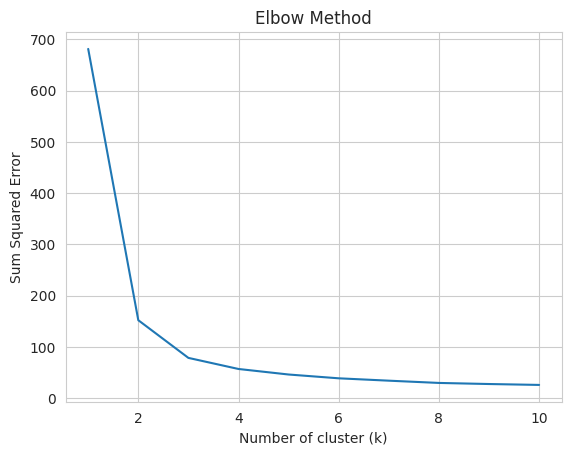

In [ ]:
sns.set_style("whitegrid")
g=sns.lineplot(x=range(1,11), y=sse)

g.set(xlabel ="Number of cluster (k)",
	ylabel = "Sum Squared Error",
	title ='Elbow Method')

plt.show()


In [ ]:
kmeans = KMeans(n_clusters = 3, random_state = 2)
kmeans.fit(X)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=2)

In [ ]:
kmeans.cluster_centers_


array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [ ]:
pred = kmeans.fit_predict(X)
pred


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

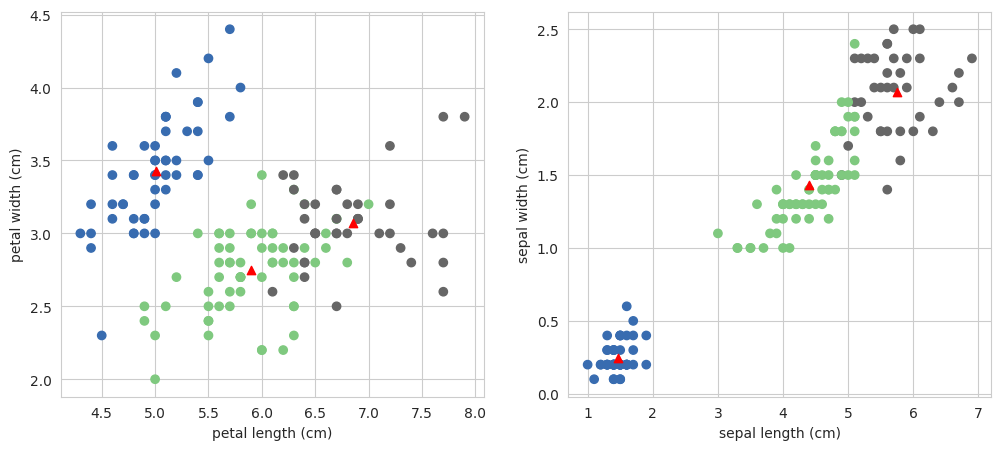

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(X[:,0],X[:,1],c = pred, cmap=cm.Accent)
plt.grid(True)
for center in kmeans.cluster_centers_:
	center = center[:2]
	plt.scatter(center[0],center[1],marker = '^',c = 'red')
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")

plt.subplot(1,2,2)
plt.scatter(X[:,2],X[:,3],c = pred, cmap=cm.Accent)
plt.grid(True)
for center in kmeans.cluster_centers_:
	center = center[2:4]
	plt.scatter(center[0],center[1],marker = '^',c = 'red')
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")
plt.show()


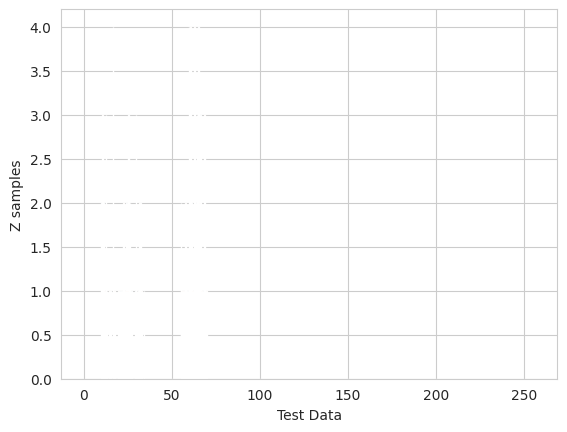

In [ ]:
# importing required tools
import numpy as np
from matplotlib import pyplot as plt

# creating two test data
X = np.random.randint(10,35,(25,2))
Y = np.random.randint(55,70,(25,2))
Z = np.vstack((X,Y))
Z = Z.reshape((50,2))

# convert to np.float32
Z = np.float32(Z)

plt.xlabel('Test Data')
plt.ylabel('Z samples')

plt.hist(Z,256,[0,256])

plt.show()


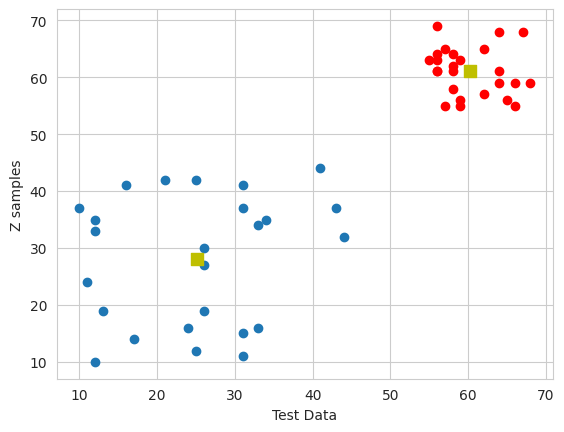

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

X = np.random.randint(10,45,(25,2))
Y = np.random.randint(55,70,(25,2))
Z = np.vstack((X,Y))

# convert to np.float32
Z = np.float32(Z)

# define criteria and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
ret,label,center = cv2.kmeans(Z,2,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

# Now separate the data
A = Z[label.ravel()==0]
B = Z[label.ravel()==1]

# Plot the data
plt.scatter(A[:,0],A[:,1])
plt.scatter(B[:,0],B[:,1],c = 'r')
plt.scatter(center[:,0],center[:,1],s = 80,c = 'y', marker = 's')
plt.xlabel('Test Data'),plt.ylabel('Z samples')
plt.show()


K-Means Clustering using PySpark Python.
typical clustering problem looks like this:

Cluster Similar Documents
Cluster Customers based on Features
Identify similar physical groups
Market Segmentation

In [ ]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488493 sha256=836673b1e4998cad6bbdc66eb04e8475eb080c369ac0b44e778c16edb454bae0
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('cluster').getOrCreate()
print('Spark Version: {}'.format(spark.version))


Spark Version: 3.5.1


In [ ]:
#Loading the data
dataset = spark.read.text("/content/sample_data/seeds_dataset.txt") # Removed an extra 'content' from the path

#show the data in the above file using the below command
dataset.show(5)

+--------------------+
|               value|
+--------------------+
|15.26\t14.84\t0.8...|
|14.88\t14.57\t0.8...|
|14.29\t14.09\t0.9...|
|13.84\t13.94\t0.8...|
|16.14\t14.99\t0.9...|
+--------------------+
only showing top 5 rows



In [ ]:
#Print schema
dataset.printSchema()


root
 |-- col1: string (nullable = true)
 |-- col2: string (nullable = true)
 |-- col3: string (nullable = true)
 |-- col4: string (nullable = true)
 |-- col5: string (nullable = true)
 |-- col6: string (nullable = true)
 |-- col7: string (nullable = true)
 |-- col8: string (nullable = true)



--2024-08-11 17:09:22--  https://raw.githubusercontent.com/PawanKrGunjan/Natural-Language-Processing/main/Sarcasm%20Detection/sarcasm.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5616834 (5.4M) [text/plain]
Saving to: ‘sarcasm.json’

sarcasm.json        100%[===================>]   5.36M  --.-KB/s    in 0.02s   

2024-08-11 17:09:22 (232 MB/s) - ‘sarcasm.json’ saved [5616834/5616834]

                                                document  cluster
11947  dna swab nabs suspect in vanessa marcotte's ki...        0
23005  parents finally cave and buy 33-year-old son p...        0
25685            item individually wrapped for no reason        0
17364        bernie sanders wins maine democratic caucus        0
15208  biden kicked out of laundromat afte

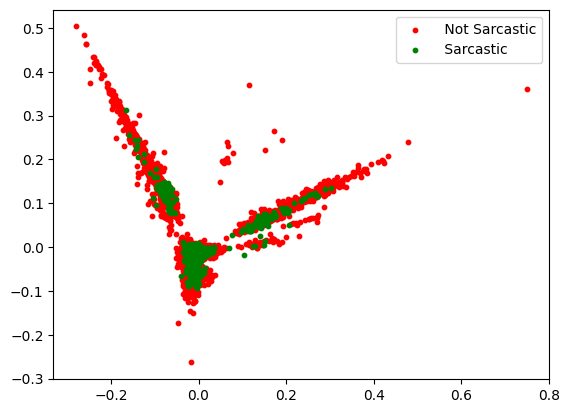

In [ ]:
# import the necessary libraries
import json
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# **Download the dataset directly using the raw URL**
!wget https://raw.githubusercontent.com/PawanKrGunjan/Natural-Language-Processing/main/Sarcasm%20Detection/sarcasm.json

# Dataset link:
# https://github.com/PawanKrGunjan/Natural-Language-Processing/blob/main/Sarcasm%20Detection/sarcasm.json
df=pd.read_json('sarcasm.json') # Now read the downloaded file

# Extract the sentence only
sentence = df.headline

# create vectorizer
vectorizer = TfidfVectorizer(stop_words='english')

# vectorizer the text documents
vectorized_documents = vectorizer.fit_transform(sentence)

# reduce the dimensionality of the data using PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(vectorized_documents.toarray())


# cluster the documents using k-means
num_clusters = 2
kmeans = KMeans(n_clusters=num_clusters, n_init=5,
				max_iter=500, random_state=42)
kmeans.fit(vectorized_documents)


# create a dataframe to store the results
results = pd.DataFrame()
results['document'] = sentence
results['cluster'] = kmeans.labels_

# print the results
print(results.sample(5))

# plot the results
colors = ['red', 'green']
cluster = ['Not Sarcastic','Sarcastic']
for i in range(num_clusters):
	plt.scatter(reduced_data[kmeans.labels_ == i, 0],
				reduced_data[kmeans.labels_ == i, 1],
				s=10, color=colors[i],
				label=f' {cluster[i]}')
plt.legend()
plt.show()

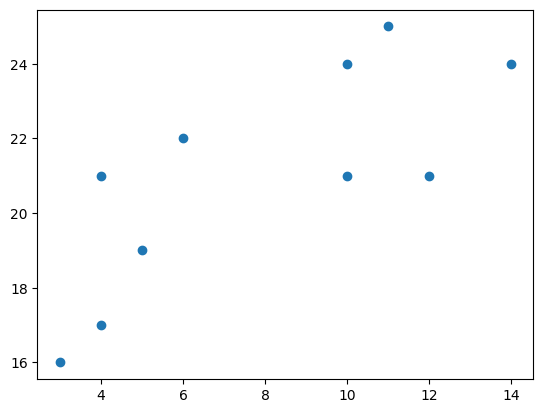

In [ ]:
import matplotlib.pyplot as plt

x = [4, 5, 10, 4, 3, 11, 14 , 6, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]

plt.scatter(x, y)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

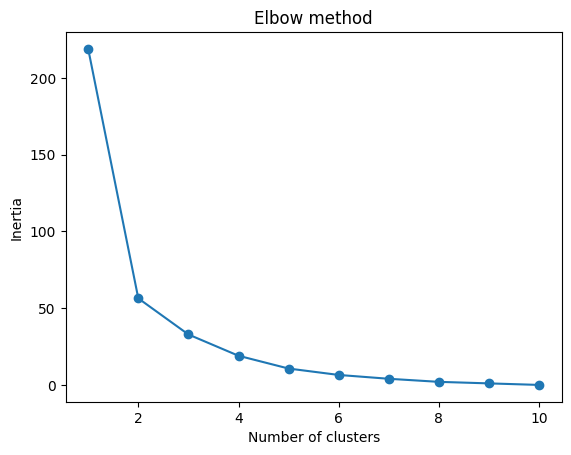

In [ ]:
from sklearn.cluster import KMeans

data = list(zip(x, y))
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

**K-mean++:**
To overcome the above-mentioned drawback we use K-means++. This algorithm ensures a smarter initialization of the centroids and improves the quality of the clustering. Apart from initialization, the rest of the algorithm is the same as the standard K-means algorithm. That is K-means++ is the standard K-means algorithm coupled with a smarter initialization of the centroids.

Initialization algorithm:

The steps involved are:


Randomly select the first centroid from the data points.
For each data point compute its distance from the nearest, previously chosen centroid.
Select the next centroid from the data points such that the probability of choosing a point as centroid is directly proportional to its distance from the nearest, previously chosen centroid. (i.e. the point having maximum distance from the nearest centroid is most likely to be selected next as a centroid)
Repeat steps 2 and 3 until k centroids have been sampled
Intuition: By following the above procedure for initialization, we pick up centroids that are far away from one another. This increases the chances of initially picking up centroids that lie in different clusters. Also, since centroids are picked up from the data points, each centroid has some data points associated with it at the end.


**Applications of k-means++ algorithm**
Image segmentation: K-means++ can be used to segment images into different regions based on their color or texture features. This is useful in computer vision applications, such as object recognition or tracking.
Customer segmentation: K-means++ can be used to group customers into different segments based on their purchasing habits, demographic data, or other characteristics. This is useful in marketing and advertising applications, as it can help businesses target their marketing efforts more effectively.
Anomaly detection: K-means++ can be used to identify outliers or anomalies in a dataset. This is useful in fraud detection, network intrusion detection, and other security applications.
Document clustering: K-means++ can be used to group similar documents together based on their content. This is useful in natural language processing applications, such as text classification or sentiment analysis.
Recommender systems: K-means++ can be used to recommend products or services to users based on their past purchases or preferences. This is useful in e-commerce and online advertising applications.

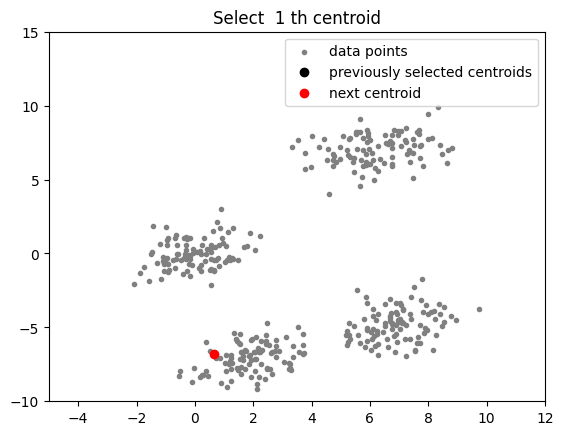

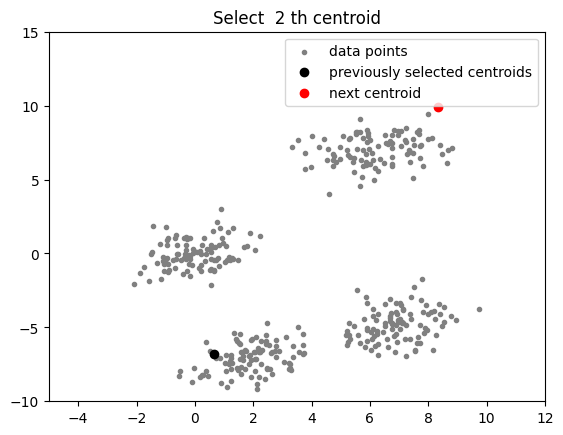

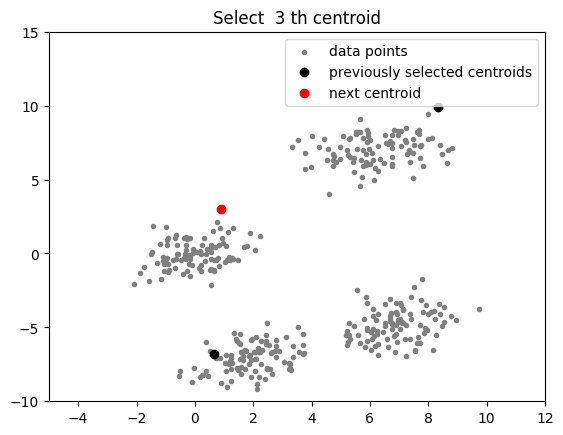

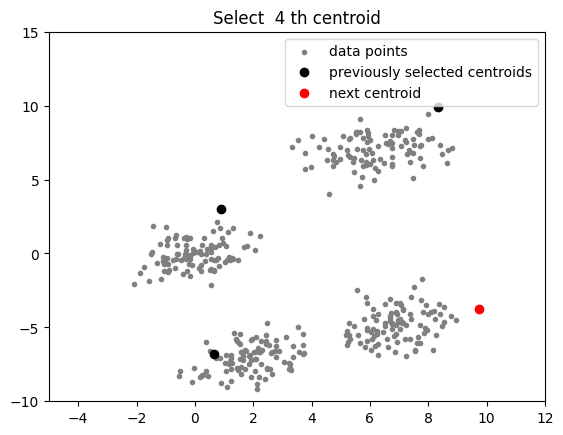

In [ ]:
# importing dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys

# creating data
mean_01 = np.array([0.0, 0.0])
cov_01 = np.array([[1, 0.3], [0.3, 1]])
dist_01 = np.random.multivariate_normal(mean_01, cov_01, 100)

mean_02 = np.array([6.0, 7.0])
cov_02 = np.array([[1.5, 0.3], [0.3, 1]])
dist_02 = np.random.multivariate_normal(mean_02, cov_02, 100)

mean_03 = np.array([7.0, -5.0])
cov_03 = np.array([[1.2, 0.5],
                   [0.5, 1]])
dist_03 = np.random.multivariate_normal(mean_03, cov_01, 100)

mean_04 = np.array([2.0, -7.0])
cov_04 = np.array([[1.2, 0.5], [0.5, 1.3]])
dist_04 = np.random.multivariate_normal(mean_04, cov_01, 100)

data = np.vstack((dist_01, dist_02, dist_03, dist_04))
np.random.shuffle(data)

# function to plot the selected centroids


def plot(data, centroids):
    plt.scatter(data[:, 0], data[:, 1], marker='.',
                color='gray', label='data points')
    plt.scatter(centroids[:-1, 0], centroids[:-1, 1],
                color='black', label='previously selected centroids')
    plt.scatter(centroids[-1, 0], centroids[-1, 1],
                color='red', label='next centroid')
    plt.title('Select % d th centroid' % (centroids.shape[0]))

    plt.legend()
    plt.xlim(-5, 12)
    plt.ylim(-10, 15)
    plt.show()

# function to compute euclidean distance
def distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2)**2))

# initialization algorithm
def initialize(data, k):
    '''
    initialized the centroids for K-means++
    inputs:
        data - numpy array of data points having shape (200, 2)
        k - number of clusters
    '''
    # initialize the centroids list and add
    # a randomly selected data point to the list
    centroids = []
    centroids.append(data[np.random.randint(
        data.shape[0]), :])
    plot(data, np.array(centroids))

    # compute remaining k - 1 centroids
    for c_id in range(k - 1):

        # initialize a list to store distances of data
        # points from nearest centroid
        dist = []
        for i in range(data.shape[0]):
            point = data[i, :]
            d = sys.maxsize

            # compute distance of 'point' from each of the previously
            # selected centroid and store the minimum distance
            for j in range(len(centroids)):
                temp_dist = distance(point, centroids[j])
                d = min(d, temp_dist)
            dist.append(d)

        # select data point with maximum distance as our next centroid
        dist = np.array(dist)
        next_centroid = data[np.argmax(dist), :]
        centroids.append(next_centroid)
        dist = []
        plot(data, np.array(centroids))
    return centroids


# call the initialize function to get the centroids
centroids = initialize(data, k=4)


**K-mode clustering is an unsupervised machine-learning technique **used to group a set of data objects into a specified number of clusters, based on their categorical attributes. The algorithm is called “K-Mode” because it uses modes (i.e. the most frequent values) instead of means or medians to represent the clusters.

In K-means clustering when we used categorical data after converting it into a numerical form. it doesn’t give a good result for high-dimensional data.
So, Some changes are made for categorical data t.

Replace Euclidean distance with Dissimilarity metric
Replace Mean by Mode for cluster centers.
Apply a frequency-based method in each iteration to update the mode.
And then this is called K-MODE Clustering because of MODE.

Dissimilarity measurements between two data objects
K-modes is an algorithm for clustering categorical data. It is used to partition a dataset into a specified number of clusters, where each cluster is characterized by a mode, which is the most frequent categorical value in the cluster.

Similarity and dissimilarity measurements are used to determine the distance between the data objects in the dataset. In the case of K-modes, these distances are calculated using a dissimilarity measure called the Hamming distance. The Hamming distance between two data objects is the number of categorical attributes that differ between the two objects.

Let x and y be two categorical data objects defined by m features or attributes.

d(x,y) = \sum_{j=1}^{m} \delta(x_{j},y_{j})

                                                        Where,

\delta(x_{j},y_{j}) = \begin{cases} 0 & \text{ if } x_{j}=  y_{j} \\ 1 & \text{ if } x_{j}\neq  y_{j} \end{cases}



In [ ]:
import numpy as np

# Define the data set with three categorical variables
data = np.array([['A', 'B', 'C'],
				['B', 'C', 'A'],
				['C', 'A', 'B'],
				['A', 'C', 'B'],
				['A', 'A', 'B']])

# Choose the number of clusters k
k = 2

# Initialize the modes for each cluster
# Use lists instead of numpy arrays for modes
modes = [['A', 'B', 'C'],
		['C', 'B', 'A']]

# Initialize the cluster assignments for each data objects
clusters = np.zeros(data.shape[0], dtype=int)
clusters_prev = np.zeros(data.shape[0], dtype=int)

# Iteratively assign data objects to
# their clusters and update the cluster modes
for i in range(10):
	# Assign data objects to the closest cluster
	for j, object in enumerate(data):
		distances = np.array([sum(object != mode) for mode in modes])
		clusters[j] = np.argmin(distances)

	# Update the cluster modes
	for j in range(k):
		# Use np.unique to find the mode for categorical data
		unique_values, counts = np.unique(data[clusters == j], axis=0, return_counts=True)
		modes[j] = unique_values[np.argmax(counts)].tolist() # Convert result back to list

	# Check if the cluster assignments have converged
	if (clusters == clusters_prev).all():
		break

	# Store the current cluster assignments
	clusters_prev = clusters

# Print the cluster assignments for each data point
print("The cluster assignments for each data object: ", clusters)

# Print the modes for each cluster
print("Modes for each cluster: ", modes)

The cluster assignments for each data object:  [0 1 0 0 0]
Modes for each cluster:  [['A', 'A', 'B'], ['B', 'C', 'A']]


In [ ]:
pip install kmodes


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 7.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 7.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 7.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 7.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 7.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 5.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 4.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100

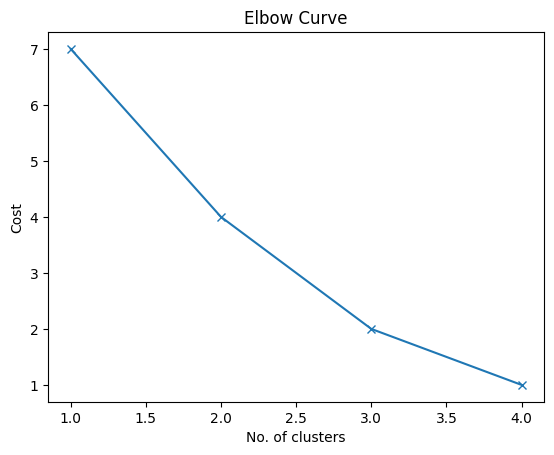

In [ ]:
# importing necessary libraries
import pandas as pd
import numpy as np
# !pip install kmodes
from kmodes.kmodes import KModes
import matplotlib.pyplot as plt
%matplotlib inline

# Elbow curve to find optimal K
cost = []
K = range(1,5)
for k in list(K):
	kmode = KModes(n_clusters=k, init = "random", n_init = 5, verbose=1)
	kmode.fit_predict(data)
	cost.append(kmode.cost_)

plt.plot(K, cost, 'x-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Curve')
plt.show()


In [ ]:
# Building the model with 3 clusters
kmode = KModes(n_clusters=2, init = "random", n_init = 5, verbose=1)
clusters = kmode.fit_predict(data)
clusters


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1, cost: 4.0
Run 1, iteration: 2/100, moves: 0, cost: 4.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 5.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 1, cost: 5.0
Run 3, iteration: 2/100, moves: 0, cost: 5.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 4.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 5.0
Best run was number 1


array([0, 1, 0, 0, 0], dtype=uint16)

Fuzzy C-means (FCM) is a method of clustering that allows points to be more than one cluster. The (FCM) is a kind of data clustering technique in which the data set is grouped into N numbers of clusters with every data point corresponding to each cluster on the basis. which is to differentiate the distance between the cluster center and the data point.

The FCM function performs Fuzzy C-means clustering, and fuzzy C-means clustering is soft skills clustering technique in Machine Learning.

Clustering
Clustering is a process of grouping the objects(data) having higher measure similarities than the object(data) in any other cluster which full fills the requirement of our criteria. it has been done by the Clustering Algorithms, various similarity measures can be used, including Euclidean, probabilistic, cosine distance, and correlation.

Dataset
The Dataset is a kind of group or storage location where we can hold(contain) the require the structured collection of information data, which is having some numeric values. And a Database has the functionality to store multiple datasets.

Note: Here we use the Iris dataset
      for Fuzzy C-means Clustering in MATLAB.
Syntax
[centers, U] = fcm(data Nc)

% perform the fcm function clustering on data and return Nc cluster center.

[centers, U] = fcm(data Nc,options)

% option means using specific  additional clustering options.

[centers, U, objFunc] = fcm( __ )

% Return objective function value and optimise iteration for above syntax.

Algorithm of FCM Clustering
So first  Let the set of data points X= { x1, x2, x3, —–, xn } and the set of clusters centers  V= { v1, v2, v3,——, vc } .

So first we will select the random c cluster center from the set of clusters center.
And then find the fuzzy membership using the given formula – μij  = 1 / ∑ck=1 (dij/dik)(2/m-1)
Here ‘m’ is the fuzziness index, which lies between [1, ∞ ], and ‘n’ is a number of data points.

Computing the fuzzy centers Vj using the formula. Vj = (∑ni=1 (μij)m xi / (∑ni=1 (μij)m) ,  for all j= 1,2,.....c
Optimize the Vj and fuzzy membership until the minimum j value is achieved.  U(k+1) - U(k) < β
In the above iteration –  

K is iteration step.
β is termination value lies between [0,1]
J is the objective function.
U=(µij)n*c  is fuzzy membership matrix.
Steps for Fuzzy C-means Clustering  
Step 1: First we create the MATLAB file in an editor and take the simple data sets and select the data set to N number cluster. So you have to make sure that whatever data set we will use here that data set should be inside MATLAB.



**ML | Mini Batch K-means clustering algorithm**
Last Updated : 02 Jun, 2024
Prerequisite: Optimal value of K in K-Means Clustering K-means is one of the most popular clustering algorithms, mainly because of its good time performance. With the increasing size of the datasets being analyzed, the computation time of K-means increases because of its constraint of needing the whole dataset in main memory. For this reason, several methods have been proposed to reduce the temporal and spatial cost of the algorithm. A different approach is the Mini batch K-means algorithm. Mini Batch K-means algorithm‘s main idea is to use small random batches of data of a fixed size, so they can be stored in memory. Each iteration a new random sample from the dataset is obtained and used to update the clusters and this is repeated until convergence. Each mini batch updates the clusters using a convex combination of the values of the prototypes and the data, applying a learning rate that decreases with the number of iterations. This learning rate is the inverse of the number of data assigned to a cluster during the process. As the number of iterations increases, the effect of new data is reduced, so convergence can be detected when no changes in the clusters occur in several consecutive iterations. The empirical results suggest that it can obtain a substantial saving of computational time at the expense of some loss of cluster quality, but not extensive study of the algorithm has been done to measure how the characteristics of the datasets, such as the number of clusters or its size, affect the partition quality.

Mini-batch K-means is a variation of the traditional K-means clustering algorithm that is designed to handle large datasets. In traditional K-means, the algorithm processes the entire dataset in each iteration, which can be computationally expensive for large datasets.

Mini-batch K-means addresses this issue by processing only a small subset of the data, called a mini-batch, in each iteration. The mini-batch is randomly sampled from the dataset, and the algorithm updates the cluster centroids based on the data in the mini-batch. This allows the algorithm to converge faster and use less memory than traditional K-means.

**The process of mini-batch K-means algorithm can be summarized as follows:**

Initialize the cluster centroids randomly or using some other method.
Repeat the following steps until convergence or a maximum number of iterations is reached:
Select a mini-batch of data from the dataset.
Assign each data point in the mini-batch to the closest cluster centroid.
Update the cluster centroids based on the data points assigned to them.
Return the final cluster centroids and the assignments of data points to clusters.
Mini-batch K-means is a trade-off between traditional K-means and online K-means. Online K-means process one data point at a time and can be sensitive to the order of the data points, while Mini-batch K-means is less sensitive to the order and faster than traditional K-means. Mini-batch K-means can also be useful when the data is too large to fit in the memory and traditional K-means can’t be applied.

The algorithm takes small randomly chosen batches of the dataset for each iteration. Each data in the batch is assigned to the clusters, depending on the previous locations of the cluster centroids. It then updates the locations of cluster centroids based on the new points from the batch. The update is a gradient descent update, which is significantly faster than a normal Batch K-Means update.

Below is the algorithm for Mini batch K-means –

Given a dataset D = {d1, d2, d3, .....dn},
                       no. of iterations t,
                       batch size b,
                       no. of clusters k.

k clusters C = {c1, c2, c3, ......ck}

initialize k cluster centers O = {o1, o2, .......ok}
# _initialize each cluster
Ci = Φ (1=< i =< k)
# _initialize no. of data in each cluster
Nci = 0 (1=< i =< k)

for j=1 to t do:
    # M is the batch dataset and xm
    # is the sample randomly chosen from D
    M = {xm | 1 =< m =< b}

    # catch cluster center for each
    # sample in the batch data set
    for m=1 to b do:
        oi(xm) = sum(xm)/|c|i (xm ε M and xm ε ci)
    end for
    # update the cluster center with each batch set

     for m=1 to b do:
        # get the cluster center for xm
        oi = oi(xm)
        # update number of data for each cluster center
        Nci = Nci + 1
        #calculate learning rate for each cluster center
        lr=1/Nci
        # take gradient step to update cluster center
        oi = (1-lr)oi + lr*xm
     end for
end for

In [ ]:
from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.metrics.pairwise import pairwise_distances_argmin
from sklearn.datasets import make_blobs # Import make_blobs directly from sklearn.datasets

# Load data in X
batch_size = 45
centers = [[1, 1], [-2, -1], [1, -2], [1, 9]]
n_clusters = len(centers)
X, labels_true = make_blobs(n_samples = 3000,
                            centers = centers,
                            cluster_std = 0.9)

# perform the mini batch K-means
mbk = MiniBatchKMeans(init ='k-means++', n_clusters = 4,
                      batch_size = batch_size, n_init = 10,
                      max_no_improvement = 10, verbose = 0)

mbk.fit(X)
mbk_means_cluster_centers = np.sort(mbk.cluster_centers_, axis = 0)
mbk_means_labels = pairwise_distances_argmin(X, mbk_means_cluster_centers)

# print the labels of each data
print(mbk_means_labels)

[2 1 1 ... 1 1 1]


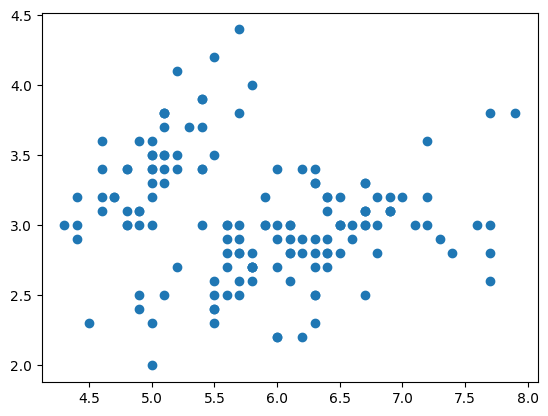

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame
from sklearn import datasets
from sklearn.mixture import GaussianMixture

# load the iris dataset
iris = datasets.load_iris()

# select first two columns
X = iris.data[:, :2]

# turn it into a dataframe
d = pd.DataFrame(X)

# plot the data
plt.scatter(d[0], d[1])
plt.show()


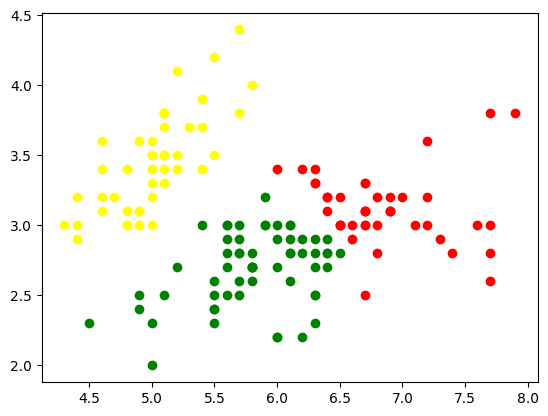

In [ ]:
gmm = GaussianMixture(n_components = 3)

# Fit the GMM model for the dataset
# which expresses the dataset as a
# mixture of 3 Gaussian Distribution
gmm.fit(d)

# Assign a label to each sample
labels = gmm.predict(d)
d['labels']= labels
d0 = d[d['labels']== 0]
d1 = d[d['labels']== 1]
d2 = d[d['labels']== 2]

# plot three clusters in same plot
plt.scatter(d0[0], d0[1], c ='r')
plt.scatter(d1[0], d1[1], c ='yellow')
plt.scatter(d2[0], d2[1], c ='g')
plt.show()


In [ ]:
# print the converged log-likelihood value
print(gmm.lower_bound_)

# print the number of iterations needed
# for the log-likelihood value to converge
print(gmm.n_iter_)


-1.4987505566235166
8


In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

data = pd.read_csv("sample_data/cancer.csv")

print(data.head())
print(data.describe())
print(data.info())

        State  Total.Rate  Total.Number  Total.Population  Rates.Age.< 18  \
0     Alabama       214.2       71529.0        33387205.0             2.0   
1      Alaska       128.1        6361.0         4966180.0             1.7   
2     Arizona       165.6       74286.0        44845598.0             2.5   
3    Arkansas       223.9       45627.0        20382448.0             2.3   
4  California       150.9      393980.0       261135696.0             2.6   

   Rates.Age.18-45  Rates.Age.45-64  Rates.Age.> 64  \
0             18.5            244.7          1017.8   
1             11.8            170.9           965.2   
2             13.6            173.6           840.2   
3             17.6            250.1          1048.3   
4             13.7            163.7           902.4   

   Rates.Age and Sex.Female.< 18  Rates.Age and Sex.Male.< 18  ...  \
0                            2.0                          2.1  ...   
1                            0.0                          0.0  ...

In [ ]:
# Select only numerical columns for scaling
X = data[['Total.Rate','Total.Number']]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # No need to reshape if using multiple features

# Create K-Means model
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_scaled)

# Get cluster labels
labels = kmeans.labels_

# Add cluster labels to the original dataset
data['cluster'] = labels

print(data.head())

        State  Total.Rate  Total.Number  Total.Population  Rates.Age.< 18  \
0     Alabama       214.2       71529.0        33387205.0             2.0   
1      Alaska       128.1        6361.0         4966180.0             1.7   
2     Arizona       165.6       74286.0        44845598.0             2.5   
3    Arkansas       223.9       45627.0        20382448.0             2.3   
4  California       150.9      393980.0       261135696.0             2.6   

   Rates.Age.18-45  Rates.Age.45-64  Rates.Age.> 64  \
0             18.5            244.7          1017.8   
1             11.8            170.9           965.2   
2             13.6            173.6           840.2   
3             17.6            250.1          1048.3   
4             13.7            163.7           902.4   

   Rates.Age and Sex.Female.< 18  Rates.Age and Sex.Male.< 18  ...  \
0                            2.0                          2.1  ...   
1                            0.0                          0.0  ...

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
